## PCA to reduce the dimensionality of a 2D dataset 

### 1. Plot the original data to observe its 2D distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generating the 2D dataset
np.random.seed(42) 
X = np.random.multivariate_normal(mean=[2, 5], cov=[[3, 2], [2, 2]], size=100)

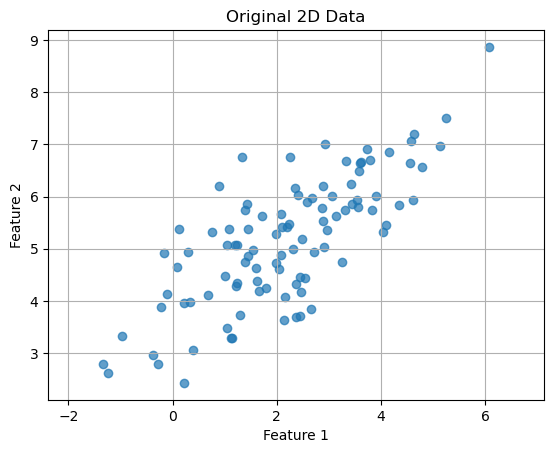

In [3]:
# Plotting the original data
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.show()


### 2. Center the data 

In [4]:
X_centered = X - np.mean(X, axis=0)


### 3. Compute the covariance matrix.

In [5]:
cov_matrix = np.cov(X_centered.T)


### 4. Calculate the eigenvalues and eigenvectors.

In [6]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Print eigenvalues
print("Eigenvalues (variance captured by each principal component):")
print(eigenvalues)

# Print eigenvectors
print("\nEigenvectors (directions of principal components):")
print(eigenvectors)


Eigenvalues (variance captured by each principal component):
[3.34538606 0.43692116]

Eigenvectors (directions of principal components):
[[ 0.79640776 -0.60476002]
 [ 0.60476002  0.79640776]]


### 5.	Project the data onto the first principal component.

In [7]:
# Projecting the data onto the first principal component
first_pc = eigenvectors[:, 0]
projected_1d_data = X_centered @ first_pc

# Recover the data back in 2D from the 1D projection for visualization
restored_2d = np.outer(projected_1d_data, first_pc) + np.mean(X, axis=0)

### 6.	Plot the 1D projection and compare it with the original.

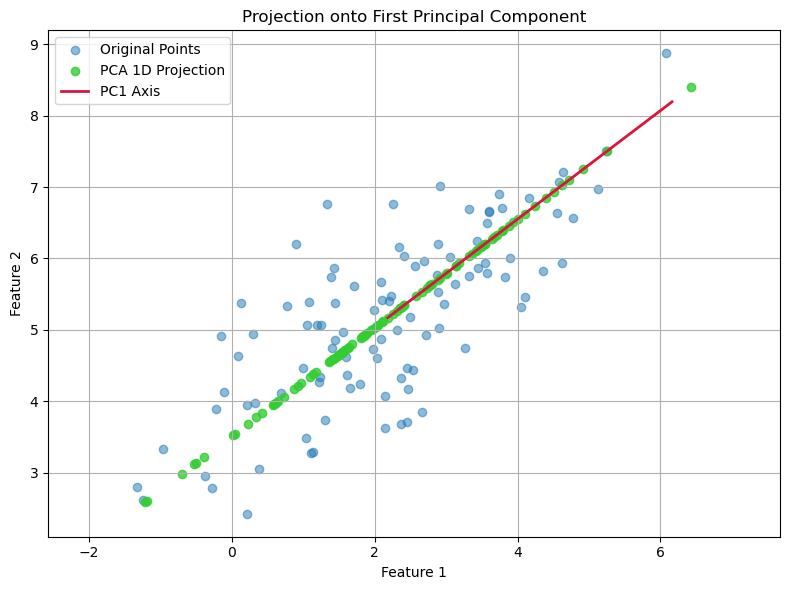

In [8]:

# Step 6: Plot the 1D projection and Compare it with original
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Original Points')

# Plot the 1D projected data, mapped back to 2D
plt.scatter(restored_2d[:, 0], restored_2d[:, 1], color='limegreen', alpha=0.8, label='PCA 1D Projection')

# Draw the direction of PC1
mean_pt = np.mean(X, axis=0)
pc1_line = mean_pt + first_pc * 5
plt.plot(
    [mean_pt[0], pc1_line[0]],
    [mean_pt[1], pc1_line[1]],
    color='crimson', linewidth=2, label='PC1 Axis'
)

# Final plot details
plt.legend()
plt.title("Projection onto First Principal Component")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.tight_layout()
plt.savefig("PCA_1D_Projection_vs_Original.png", dpi=300)
plt.show()


### 7.  Plot the amount of variance explained by each component.

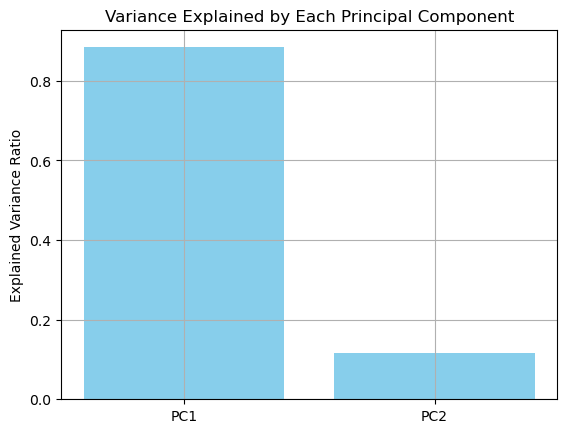

In [9]:
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

plt.bar(['PC1', 'PC2'], explained_variance_ratio, color='skyblue')
plt.ylabel("Explained Variance Ratio")
plt.title("Variance Explained by Each Principal Component")
plt.grid(True)
plt.show()



## t-SNE on the Digits Dataset

### 1. Inspect the shape of X and y.

In [10]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data     # shape (1797, 64)
y = digits.target   # labels: 0–9


### 2.	Apply TSNE from sklearn.manifold with n_components=2.

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)


### 3.	Visualize the 2D t-SNE embedding using matplotlib.pyplot.scatter, color-coded by digit labels.

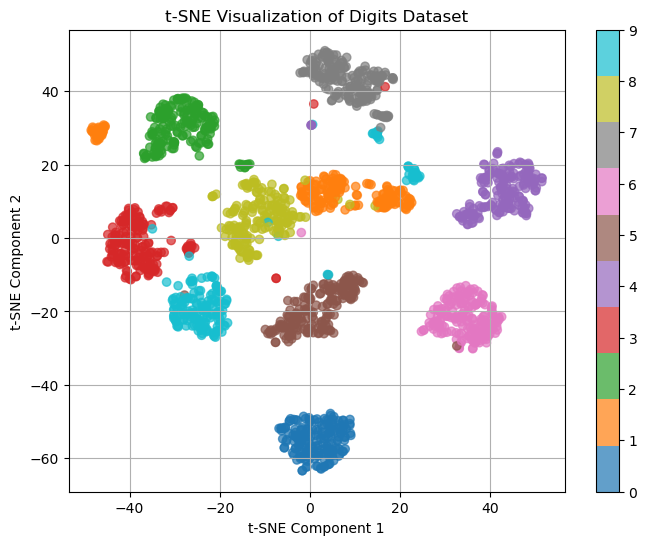

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.colorbar()
plt.title("t-SNE Visualization of Digits Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()


### 4. Try different perplexity values (e.g., 5, 30, 50) and compare how clusters change.

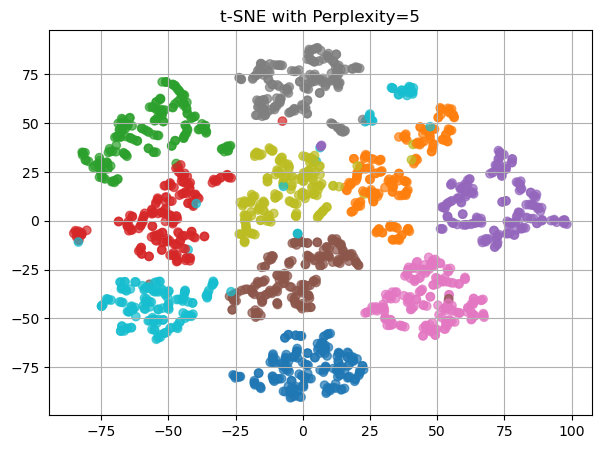

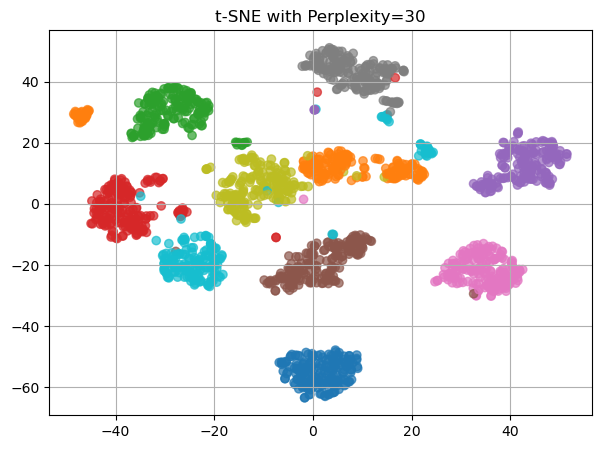

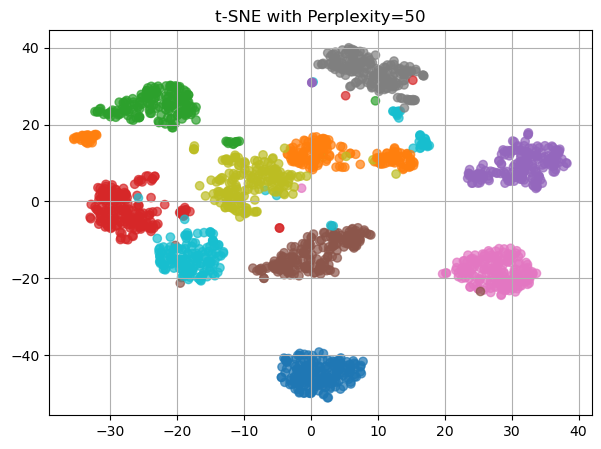

In [13]:
for p in [5, 30, 50]:
    tsne = TSNE(n_components=2, perplexity=p, random_state=42)
    X_tsne = tsne.fit_transform(X)
    plt.figure(figsize=(7, 5))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', alpha=0.7)
    plt.title(f"t-SNE with Perplexity={p}")
    plt.grid(True)
    plt.show()
